# Doctor's Consultation Fee:

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. 
As a data scientist we all should do better. What if you have data that records important details about a doctor and 
you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.

Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.
    
So here we will use different regression methods to predict the Doctor's Consultation Fee.

# 1-Data Exploration (Reading the data and Attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the train and test dataset using utf-8 encoding method
DocFee_train=pd.read_excel('DFee_Train.xlsx',encoding='utf-8')
DocFee_test=pd.read_excel('DFee_Test.xlsx',encoding='utf-8')
print(DocFee_train.shape)
print(DocFee_test.shape)

(5961, 7)
(1987, 6)


In [3]:
#printing the train data
print(DocFee_train.head())

                    Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ₹250 Available on...   250

In [4]:
#lets print the train data information
print(DocFee_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
None


In [5]:
#printing the test data
print(DocFee_test.head())

                                     Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

  Rating                        Place           Profile  \
0    NaN       Ghatkopar East, Mumbai  General Medicine   
1    NaN  West Marredpally, Hyderabad    ENT Specialist   
2    70%            KK Nagar, Chennai    Dermatologists   
3    NaN       New Ashok Nagar, Delhi          Ayurveda   
4   100%    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info  
0                                                NaN  
1                                                NaN  
2                   70% 4 Fee

In [6]:
#lets print the test data information
print(DocFee_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB
None


# 2-Exploratory Data Analysis (Exploring, Imputing, Cleaning & Visualizing)

In [21]:
#so to explore data better we can append both train and test data. 
#So we will combine both train and test for our dayta analysis and for data visualization,
#feature engineering, one-hot encoding, and label encoding as all the attributes are object in nature except price. 
#Later we will split this combined data back to train and test datasets.

DocFee_train['source']='train'
DocFee_test['source']='test'
DocFee_test['Fees'] = 0
combidata = pd.concat([DocFee_train,DocFee_test],sort=False)
print(DocFee_train.shape)
print(DocFee_test.shape)
print(combidata.shape)

(5961, 8)
(1987, 8)
(7948, 8)


In [8]:
#printing the combine data
print(combidata.head())

                    Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees source  
0               100% 16 Feedback Kakkanad, Ernakulam   100  train  
1              98% 76 Feedback Whitefield, Bangalore   350  train  
2                                                NaN   300  train  
3  Bannerghatta Road, Bangalor

In [9]:
#lets print the combine data information
print(combidata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       7948 non-null   object
 1   Experience          7948 non-null   object
 2   Rating              3556 non-null   object
 3   Place               7917 non-null   object
 4   Profile             7948 non-null   object
 5   Miscellaneous_Info  4494 non-null   object
 6   Fees                7948 non-null   int64 
 7   source              7948 non-null   object
dtypes: int64(1), object(7)
memory usage: 558.8+ KB
None


In [10]:
#lets see the categorical variable, and the number of unique values in each of them.
combidata.apply(lambda x: len(x.unique()))

Qualification         1801
Experience              64
Rating                  53
Place                  949
Profile                  6
Miscellaneous_Info    3981
Fees                    41
source                   2
dtype: int64

In [11]:
#lets see what are the types of data are present in each attribute which will help us to analyze.
for columns in combidata:
    print("Column Name:",columns)
    #print(np.unique(combidata[columns], return_counts=True))
    print(combidata[columns].value_counts())
    print("\n")

Column Name: Qualification
BDS                                                                                                     632
BHMS                                                                                                    627
BAMS                                                                                                    624
MBBS                                                                                                    441
MBBS, MS - ENT                                                                                          280
                                                                                                       ... 
MD - Dermatology , Venereology & Leprosy, Fellow of the American Academy of Dermatology (FAAD), MBBS      1
MBBS, Master of Family Medicine, Diploma in Geriatric Medicine                                            1
MDS - Oral & Maxillofacial Pathology and Microbiology, BDS                                                1
M

In [12]:
tempdata=combidata.drop(['Fees','source'],axis=1,inplace=False)
tempdata.head(100)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam"
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore"
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai"
...,...,...,...,...,...,...
95,BHMS,12 years experience,100%,"Kanakpura Road, Bangalore",Homeopath,Pediaterics Skin Disorder Kidney Stone Treatment
96,"MD - Dermatology , Venereology & Leprosy, MBBS",13 years experience,97%,"Green Park, Delhi",Dermatologists,General dermatology Botox Injections Skin Boos...
97,"MBBS, DDVL",24 years experience,NaN,"Maduravoyal, Chennai",Dermatologists,NaN
98,BAMS,27 years experience,NaN,"Dahisar East, Mumbai",Ayurveda,NaN


In [22]:
#so here by looking the data we can drop below attributes
#drop Qualification attribute as we will consider Profile attribute
#drop Rating attribute as this is directly propertional to Experience and 
#also Rating attribute has 50% of missing data, so we can not replace those values
#similarly we can drop Miscellaneous_Info attribute which has 50% of missing data, so we can not replace those values

combidata=combidata.drop(columns=['Rating','Miscellaneous_Info'])
print(combidata.shape)
print(combidata.head())

(7948, 6)
                    Qualification           Experience  \
0           BHMS, MD - Homeopathy  24 years experience   
1    BAMS, MD - Ayurveda Medicine  12 years experience   
2  MBBS, MS - Otorhinolaryngology   9 years experience   
3             BSc - Zoology, BAMS  12 years experience   
4                            BAMS  20 years experience   

                          Place         Profile  Fees source  
0           Kakkanad, Ernakulam       Homeopath   100  train  
1         Whitefield, Bangalore        Ayurveda   350  train  
2    Mathikere - BEL, Bangalore  ENT Specialist   300  train  
3  Bannerghatta Road, Bangalore        Ayurveda   250  train  
4         Keelkattalai, Chennai        Ayurveda   250  train  


In [23]:
#lets see the categorical variable, and the number of unique values in each of them.
combidata.apply(lambda x: len(x.unique()))

Qualification    1801
Experience         64
Place             949
Profile             6
Fees               41
source              2
dtype: int64

In [24]:
#lets print the combine data information
print(combidata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  7948 non-null   object
 1   Experience     7948 non-null   object
 2   Place          7917 non-null   object
 3   Profile        7948 non-null   object
 4   Fees           7948 non-null   int64 
 5   source         7948 non-null   object
dtypes: int64(1), object(5)
memory usage: 434.7+ KB
None


In [25]:
#so here we saw that there are 31 (7948-7917=31) missing information for place attribute, 
#as the place name is different so we will drop those records for whcih the place was missing

combidata=combidata.dropna(how='any', subset=['Place'])
combidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7917 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  7917 non-null   object
 1   Experience     7917 non-null   object
 2   Place          7917 non-null   object
 3   Profile        7917 non-null   object
 4   Fees           7917 non-null   int64 
 5   source         7917 non-null   object
dtypes: int64(1), object(5)
memory usage: 433.0+ KB


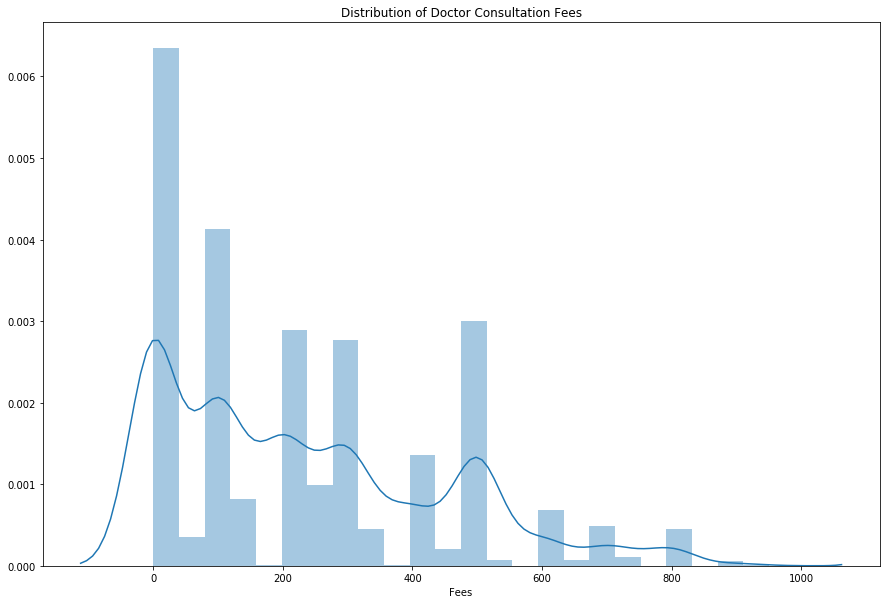

In [26]:
# now lets see the distribution of "Fees" in the dataset
plt.figure(figsize=(15,10))
plt.title('Distribution of Doctor Consultation Fees')
sns.distplot(combidata['Fees'])

#so by looking this the data is skewed, so we will treat them later.

                                    Qualification    Fees
0                                            BHMS  139849
1                                            BAMS   99619
2                                             BDS   97265
3                                  MBBS, MS - ENT   89900
4                                            MBBS   78160
5                          MBBS, MD - Dermatology   73350
6                     MBBS, MD - General Medicine   56750
7  MBBS, MD - Dermatology , Venereology & Leprosy   55200
8                                      MBBS, DDVL   34500
9                           BHMS, MD - Homeopathy   29550


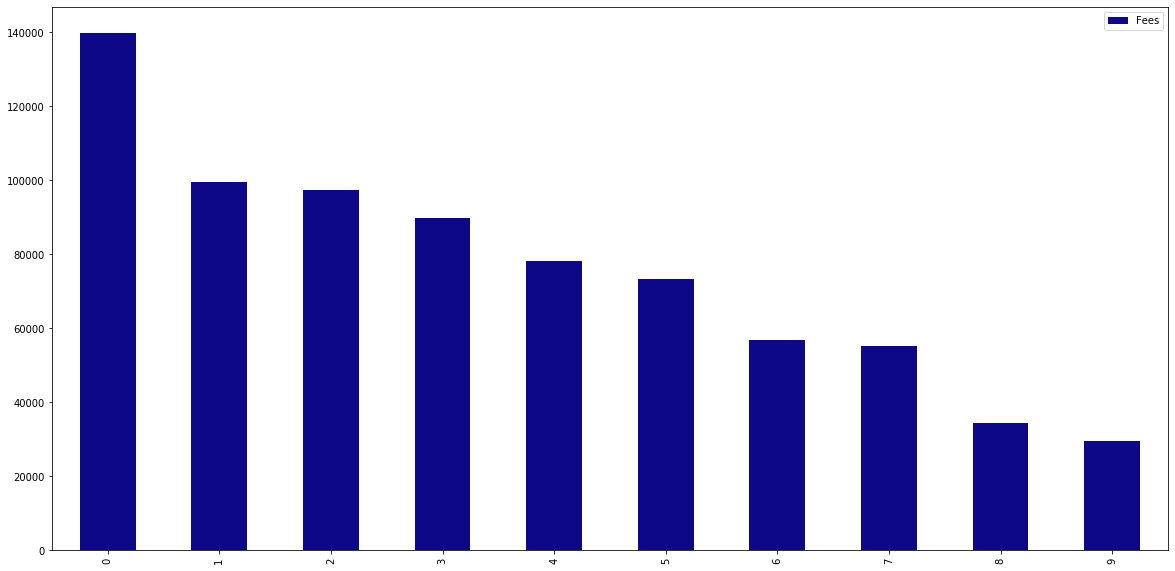

In [27]:
#lets see the Fees wrt Qualification
top_cases=combidata[['Fees','Qualification']].groupby('Qualification').sum().sort_values('Fees',ascending=False).head(10)
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

            Experience   Fees
0   9 years experience  96790
1  10 years experience  90580
2  12 years experience  87200
3   8 years experience  86600
4  14 years experience  85870
5  11 years experience  85750
6  19 years experience  82390
7  13 years experience  79240
8   7 years experience  70019
9   6 years experience  65385


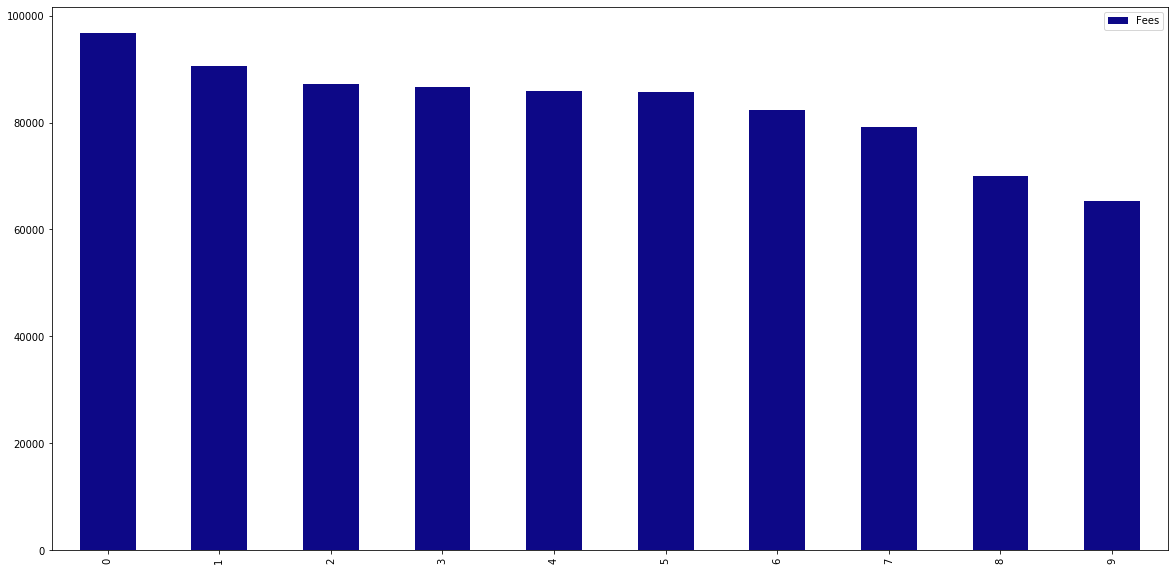

In [28]:
#lets see the Fees wrt Experience
top_cases=combidata[['Fees','Experience']].groupby('Experience').sum().sort_values('Fees',ascending=False).head(10)
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

                      Place   Fees
0             Dwarka, Delhi  26900
1     HSR Layout, Bangalore  25649
2      Andheri West, Mumbai  25530
3  Banjara Hills, Hyderabad  24550
4        Malad West, Mumbai  19500
5    Indiranagar, Bangalore  19100
6     Whitefield, Bangalore  18750
7             Powai, Mumbai  18570
8       Mulund West, Mumbai  18400
9     Borivali West, Mumbai  18299


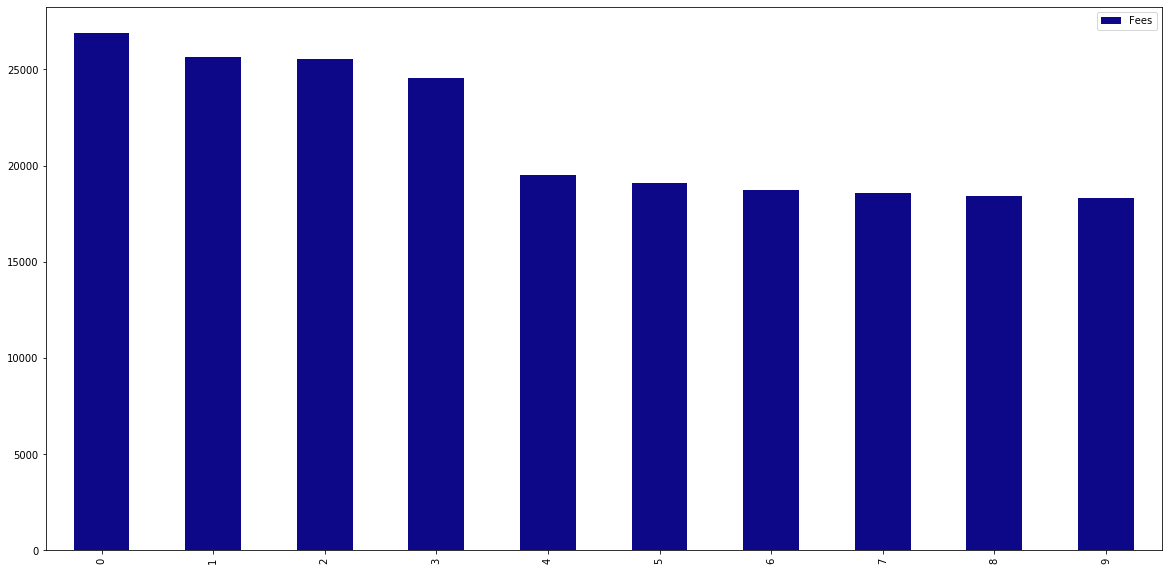

In [29]:
#lets see the Fees wrt Place
top_cases=combidata[['Fees','Place']].groupby('Place').sum().sort_values('Fees',ascending=False).head(10)
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

            Profile    Fees
0    Dermatologists  403950
1  General Medicine  368215
2           Dentist  332765
3    ENT Specialist  281970
4         Homeopath  258379
5          Ayurveda  187829


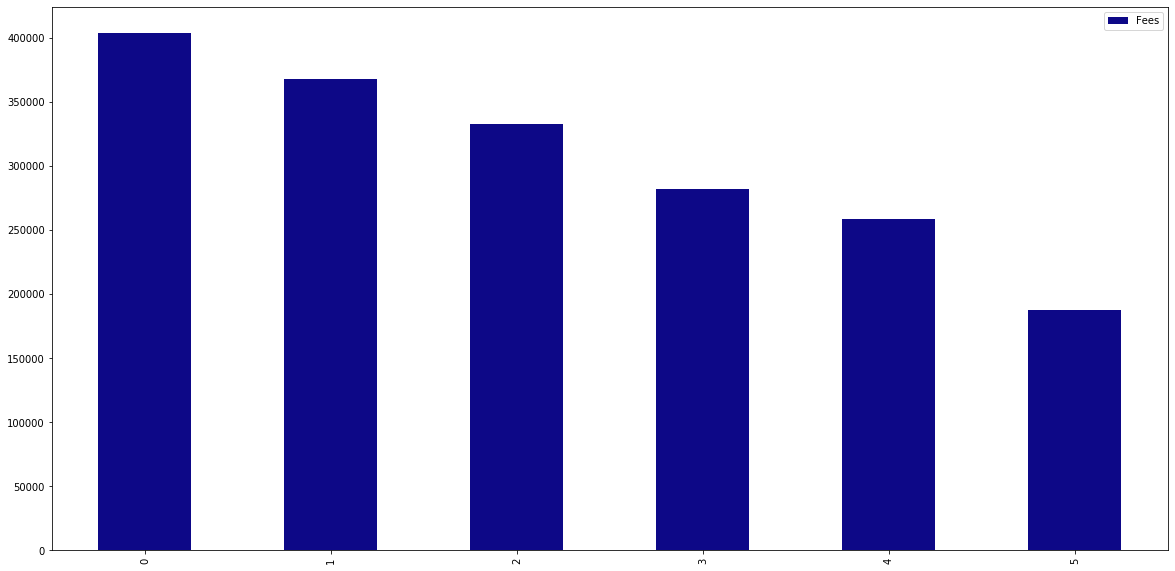

In [30]:
#lets see the Fees wrt Profile
top_cases=combidata[['Fees','Profile']].groupby('Profile').sum().sort_values('Fees',ascending=False).head(10)
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

In [31]:
#lets print all the columns name and create a array for all categorical data to convert them to numerical value.
print(combidata.columns)

Index(['Qualification', 'Experience', 'Place', 'Profile', 'Fees', 'source'], dtype='object')


In [32]:
#Now convert all the categorical variable to numerical varibale using label encoder.
cat_data=['Qualification','Experience','Place','Profile']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    combidata[i] = le.fit_transform(combidata[i])

In [33]:
#lets again see what are the types of data are present in each attribute after label encoder.
for columns in combidata:
    print("Column Name:",columns)
    print(np.unique(combidata[columns], return_counts=True))
    print(combidata[columns].value_counts())
    print("\n")

Column Name: Qualification
(array([   0,    1,    2, ..., 1797, 1798, 1799]), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))
168     632
424     627
16      624
748     441
1365    280
       ... 
942       1
946       1
950       1
954       1
0         1
Name: Qualification, Length: 1800, dtype: int64


Column Name: Experience
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]), array([ 88, 404, 374, 358, 325, 332, 257, 237, 251, 254, 343,  80, 204,
       202, 183, 168, 131, 115, 103, 111, 111, 113, 144,  86,  81,  81,
        73,  94,  65,  73,  69,  84,  70, 159,  61,  48,  52,  50,  48,
        28,  38,  20,  17,  22, 238,  12,  14,   6,   4,   7,   3,   4,
         2,   1,   5, 280,   1,   1,   1,   2,   1, 329, 380, 419],
      dtype=int64))
63    41

In [34]:
#again checking the information of the data
combidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7917 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  7917 non-null   int32 
 1   Experience     7917 non-null   int32 
 2   Place          7917 non-null   int32 
 3   Profile        7917 non-null   int32 
 4   Fees           7917 non-null   int64 
 5   source         7917 non-null   object
dtypes: int32(4), int64(1), object(1)
memory usage: 309.3+ KB


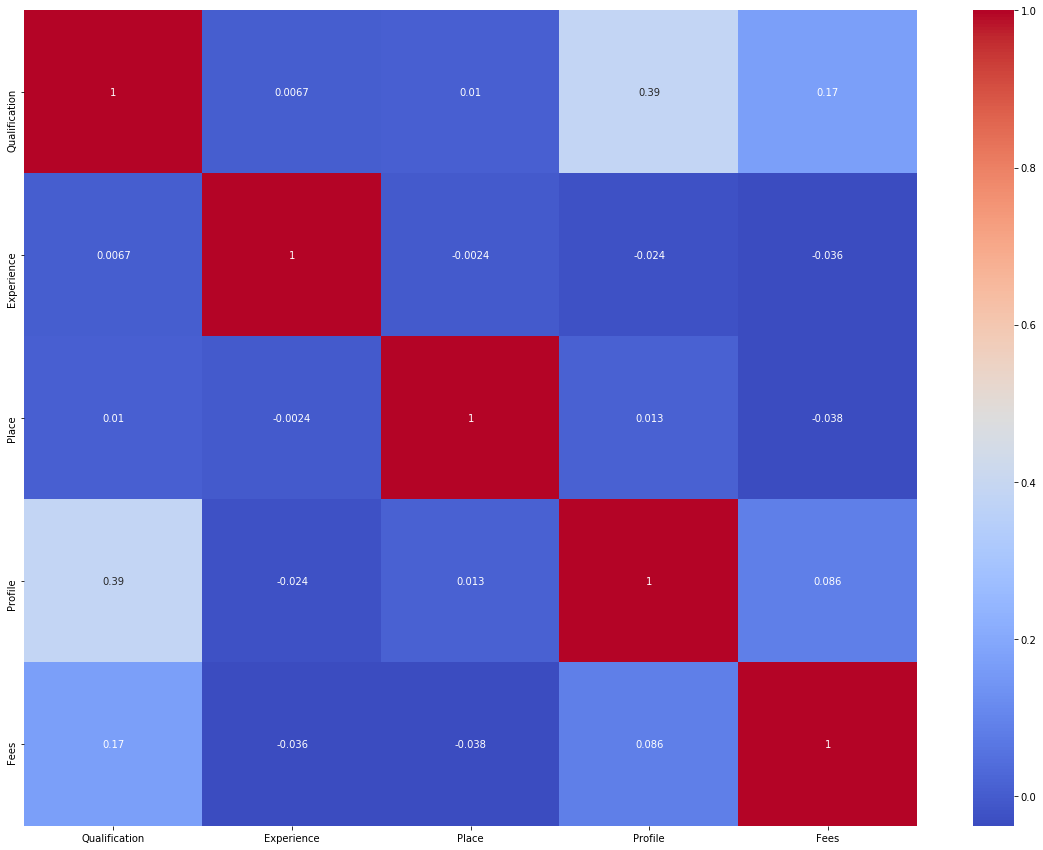

In [35]:
#lets see the corelation among data
plt.figure(figsize=(20,15))
sns.heatmap(combidata.corr(),cmap='coolwarm',annot=True)

#so by looking the corelation of data, we can say that Profile and Qualification attributes has most significant.

Qualification       AxesSubplot(0.125,0.125;0.133621x0.755)
Experience       AxesSubplot(0.285345,0.125;0.133621x0.755)
Place             AxesSubplot(0.44569,0.125;0.133621x0.755)
Profile          AxesSubplot(0.606034,0.125;0.133621x0.755)
Fees             AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

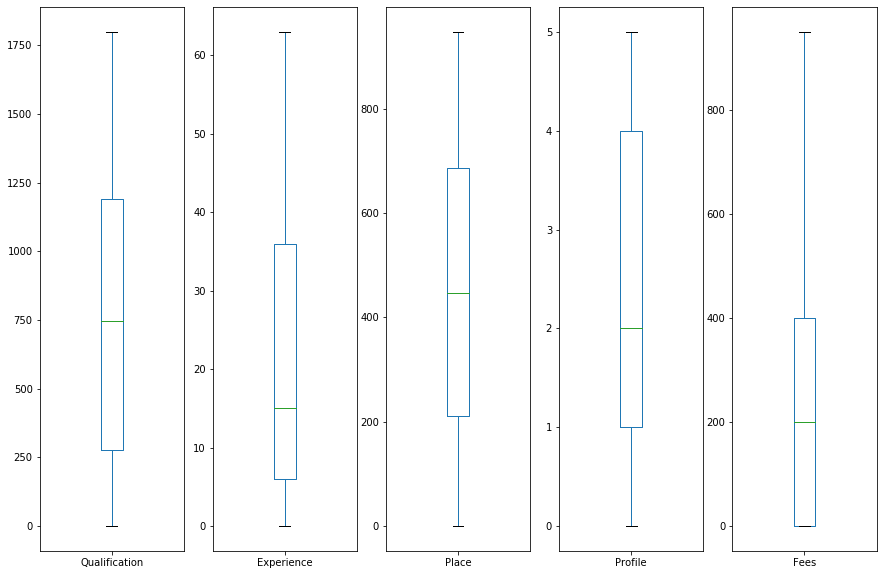

In [38]:
#checking the outliers with box plot
combidata.plot(kind='box',subplots=True, figsize=(15,10))

#so here we saw that there are no outlier data present.

In [41]:
# Now our data is ready for model building, so split them into original train and test dataset

dcfees_train = combidata.loc[combidata['source']=="train"]
dcfees_test = combidata.loc[combidata['source']=="test"]
print(dcfees_train.shape)
print(dcfees_test.shape)

(5936, 6)
(1981, 6)


In [42]:
#Drop the columns which are added initially for data analysis
dcfees_train.drop(['source'],axis=1,inplace=True)
dcfees_test.drop(['Fees','source'],axis=1,inplace=True)
print(dcfees_train.shape)
print(dcfees_test.shape)

(5936, 5)
(1981, 4)


In [43]:
#lets check the skewness of the train data
dcfees_train.skew()

Qualification    0.260240
Experience      -0.340303
Place            0.102777
Profile          0.105341
Fees            -0.307713
dtype: float64

In [44]:
#lets check the skewness of the test data
dcfees_test.skew()

Qualification    0.208130
Experience      -0.392945
Place            0.113232
Profile          0.026189
dtype: float64

In [45]:
#Now Export the final dataset:
dcfees_train.to_csv("dcfees_train.csv",index=False)
dcfees_test.to_csv("dcfees_test.csv",index=False)

# 3-Preparing the Train data for Model Building

In [46]:
#lets import the final train and test dataset and print them
dcfees_train=pd.read_csv('dcfees_train.csv')
dcfees_test=pd.read_csv('dcfees_test.csv')

print(dcfees_train.shape)
print(dcfees_test.shape)

(5936, 5)
(1981, 4)


In [47]:
#printing the train data
print(dcfees_train.head())

   Qualification  Experience  Place  Profile      Fees
0            491    2.833213    327        5  4.615121
1             92    1.386294    936        0  5.860786
2           1441    4.158883    499        3  5.707110
3            572    1.386294     74        0  5.525453
4             16    2.564949    369        0  5.525453


In [51]:
# separating the input and output/target variables of dtrain
import numpy as np
x=dcfees_train.drop(columns=['Fees'],axis=1)
y=dcfees_train[['Fees']]

print(x.shape)
print(y.shape)

(5936, 4)
(5936, 1)


In [ ]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# 4-Building Different Model and Finding the Best Model

In [52]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso(alpha=0.1)
from sklearn.linear_model import Ridge
lrreg=Ridge(alpha=0.1)
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [53]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [54]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 63


R2 Score is: 0.08559084834852415




************************ KNeighborsRegressor **********************


Final Random State is: 53


R2 Score is: 0.0465771390325046




************************ Lasso **********************


Final Random State is: 43


R2 Score is: 0.08055256548073775




************************ Ridge **********************


Final Random State is: 63


R2 Score is: 0.08559078484684934




************************ GradientBoostingRegressor **********************


Final Random State is: 63


R2 Score is: 0.20366657465296145




************************ AdaBoostRegressor **********************


Final Random State is: 65


R2 Score is: 0.0937427858223322




************************ RandomForestRegressor **********************


Final Random State is: 66


R2 Score is: 0.14953790871774442






In [55]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            63   8.559085
1        KNeighborsRegressor            53   4.657714
2                      Lasso            43   8.055257
3                      Ridge            63   8.559078
4  GradientBoostingRegressor            63  20.366657
5          AdaBoostRegressor            65   9.374279
6      RandomForestRegressor            66  14.953791


In [56]:
# So here GradientBoostingClassifier is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor 
gdrreg=GradientBoostingRegressor()
parameters={'learning_rate':[0.01,0.1,0.5,1.0],'n_estimators':[100,200,500],'loss':['ls','lad','huber','quantile']}
clf=GridSearchCV(gdrreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 500}

In [57]:
# So lets build the final model with 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 500 and random_state=63

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=63)
gbrreg=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500,loss='huber')
gbrreg.fit(x_train,y_train)
y_pred=gbrreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.22663821045898347
RMSE is: 0.5968617785465605


In [58]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of GradientBoostingRegressor is:', cross_val_score(gbrreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of GradientBoostingRegressor is:',cross_val_score(gbrreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of GradientBoostingRegressor is: 0.19006965560361588
Standard Deviation of GradientBoostingRegressor is: 0.036827638486433764


In [59]:
#lets predict the Consultation Fees
print('Actual Consultation Fees:\n',y_test)
print('Predicted Consultation Fees:\n',y_pred)

#So by looking this we can conclude that our model is predicting around 86% of correct results 
#for predicting the claim amount auto insurance.

Actual Consultation Fees:
           Fees
634   5.303305
5305  5.303305
2565  5.303305
482   5.707110
383   6.398595
...        ...
5402  6.216606
3288  5.303305
4240  5.707110
524   5.993961
3191  6.216606

[1188 rows x 1 columns]
Predicted Consultation Fees:
 [5.53981047 5.41466496 5.28020568 ... 5.18242049 6.02674052 5.45702159]


In [60]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(gbrreg,'gbrreg_dcfees.obj')

['gbrreg_dcfees.obj']

In [61]:
# load the model from the file
dcfees_from_joblib=joblib.load('gbrreg_dcfees.obj')

In [62]:
#Use the loaded model to make predictions against test data
dcfees_from_joblib.predict(x_test)

array([5.53981047, 5.41466496, 5.28020568, ..., 5.18242049, 6.02674052,
       5.45702159])

In [63]:
#lets predict the price of flight ticket for test dataset which provided initially
dcfees_predict=dcfees_from_joblib.predict(dcfees_test)
print(dcfees_predict)

[5.31822679 5.8354133  5.84956962 ... 5.62516539 5.12568606 5.80463776]


# Conclusion:
    
So here 'RandomForestRegressor Model' is the best model out of all model tested above and by looking this we can 
conclude that our model is predicting just more than 22% of correct results for predicting the doctors consultation fees.